# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](https://superchon-udacity.s3.us-west-1.amazonaws.com/kaggle1.png)
![kaggle2.png](https://superchon-udacity.s3.us-west-1.amazonaws.com/kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](https://superchon-udacity.s3.us-west-1.amazonaws.com/kaggle3.png)
![kaggle4.png](https://superchon-udacity.s3.us-west-1.amazonaws.com/kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](https://superchon-udacity.s3.us-west-1.amazonaws.com/kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

     |████████████████████████████████| 2.1 MB 5.3 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.3 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 64.9 MB/s eta 0:00:00
  Preparing metadata (setup.py

### Setup Kaggle API Key

In [ ]:
!pwd

/content


In [ ]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Fill in your user name and key from creating the kaggle account and API token file
import json

kaggle_username = "username"
kaggle_key = "password"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the [bike sharing demand competition](https://www.kaggle.com/c/bike-sharing-demand) and agree to the terms
![kaggle6.png](https://superchon-udacity.s3.us-west-1.amazonaws.com/kaggle6.png)

In [ ]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 24.1MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularPredictor

In [ ]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.

In [ ]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv')
test.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981
6492,2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981


In [ ]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv')
submission.tail()

,datetime,count
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0
6492,2012-12-31 23:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are predicting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [ ]:
train[train.columns[~train.columns.isin(['casual', 'registered'])]].head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [ ]:
df_train, df_eval = train_test_split(train[train.columns[~train.columns.isin(['casual', 'registered'])]], test_size=0.2, random_state=0)

In [ ]:
# train on a 80% of data first, and use the other 20% to evaluate model before training the whole model using 100% data for submission

predictor_80 = TabularPredictor(label="count", problem_type="regression", eval_metric="root_mean_squared_error").fit(
    train_data=df_train,
    time_limit=600,
    presets="best_quality",
)

No path specified. Models will be saved in: "AutogluonModels/ag-20220404_052057/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220404_052057/"
AutoGluon Version:  0.4.0
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    8708
Train Data Columns: 9
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11059.11 MB
	Train Data (Original)  Memory Usage: 1.22 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityF

In [ ]:
# predictor = TabularPredictor(?).fit(?)

predictor = TabularPredictor(label="count", problem_type="regression", eval_metric="root_mean_squared_error").fit(
    train_data=train[train.columns[~train.columns.isin(['casual', 'registered'])]],
    time_limit=600,
    presets="best_quality",
)

No path specified. Models will be saved in: "AutogluonModels/ag-20220409_043721/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220409_043721/"
AutoGluon Version:  0.4.0
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12213.22 MB
	Train Data (Original)  Memory Usage: 1.52 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting Identity

### Review AutoGluon's training run with ranking of models that did the best.

In [ ]:
predictor_80.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -74.600621       8.219254  504.702473                0.001062           0.806916            3       True         18
1   RandomForestMSE_BAG_L2  -75.593058       7.386622  408.802835                0.567587          25.267064            2       True         14
2     ExtraTreesMSE_BAG_L2  -75.684615       7.386515  391.098177                0.567480           7.562406            2       True         16
3          LightGBM_BAG_L2  -76.263030       7.022476  408.408918                0.203441          24.873148            2       True         13
4          CatBoost_BAG_L2  -76.383390       6.879684  446.192939                0.060649          62.657168            2       True         15
5        LightGBMXT_BAG_L2  -80.549232       7.998676  426.620372         

{'leaderboard':                      model   score_val  pred_time_val    fit_time  \
 0      WeightedEnsemble_L3  -74.600621       8.219254  504.702473   
 1   RandomForestMSE_BAG_L2  -75.593058       7.386622  408.802835   
 2     ExtraTreesMSE_BAG_L2  -75.684615       7.386515  391.098177   
 3          LightGBM_BAG_L2  -76.263030       7.022476  408.408918   
 4          CatBoost_BAG_L2  -76.383390       6.879684  446.192939   
 5        LightGBMXT_BAG_L2  -80.549232       7.998676  426.620372   
 6    KNeighborsDist_BAG_L1  -94.488129       0.105579    0.040026   
 7      WeightedEnsemble_L2  -94.488129       0.106321    0.891063   
 8   NeuralNetFastAI_BAG_L2 -110.298901       7.439639  412.649065   
 9    KNeighborsUnif_BAG_L1 -112.769894       0.106366    0.035975   
 10  RandomForestMSE_BAG_L1 -120.739250       1.164054    8.879346   
 11    ExtraTreesMSE_BAG_L1 -126.846044       0.528322    4.255800   
 12         CatBoost_BAG_L1 -132.981728       0.076344  139.172342   
 13  

In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -52.683629      13.200024  529.890893                0.000871           0.525904            3       True         17
1   RandomForestMSE_BAG_L2  -53.380499      12.038270  404.336178                0.473447          23.827991            2       True         13
2     ExtraTreesMSE_BAG_L2  -53.707967      12.065958  386.788152                0.501135           6.279965            2       True         15
3          LightGBM_BAG_L2  -55.113400      11.762690  398.462271                0.197867          17.954084            2       True         12
4          CatBoost_BAG_L2  -55.476797      11.615503  451.833266                0.050680          71.325079            2       True         14
5   NeuralNetFastAI_BAG_L2  -58.630338      11.976025  409.977870         

{'leaderboard':                      model   score_val  pred_time_val    fit_time  \
 0      WeightedEnsemble_L3  -52.683629      13.200024  529.890893   
 1   RandomForestMSE_BAG_L2  -53.380499      12.038270  404.336178   
 2     ExtraTreesMSE_BAG_L2  -53.707967      12.065958  386.788152   
 3          LightGBM_BAG_L2  -55.113400      11.762690  398.462271   
 4          CatBoost_BAG_L2  -55.476797      11.615503  451.833266   
 5   NeuralNetFastAI_BAG_L2  -58.630338      11.976025  409.977870   
 6        LightGBMXT_BAG_L2  -60.072390      13.955284  420.714164   
 7    KNeighborsDist_BAG_L1  -84.125061       0.104341    0.031198   
 8      WeightedEnsemble_L2  -84.125061       0.104911    0.471038   
 9    KNeighborsUnif_BAG_L1 -101.546199       0.103431    0.044215   
 10  RandomForestMSE_BAG_L1 -116.621736       0.420460    8.433380   
 11    ExtraTreesMSE_BAG_L1 -124.637158       0.415073    3.636559   
 12         CatBoost_BAG_L1 -130.472837       0.127578  193.649223   
 13  

### Create predictions from test dataset

In [ ]:
# evaluate the model using the 20% un-seen data

performance = predictor_80.evaluate(df_eval)

Evaluation: root_mean_squared_error on test data: -76.63530926799496
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -76.63530926799496,
    "mean_squared_error": -5872.970626601277,
    "mean_absolute_error": -46.15292219288093,
    "r2": 0.8232408998827843,
    "pearsonr": 0.9073707920145923,
    "median_absolute_error": -23.644819259643555
}


In [ ]:
# make prediction from model trained with 100% data

predictions = predictor.predict(test)
predictions.head()

0    23.834574
1    41.225704
2    45.285786
3    47.159031
4    51.028183
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [ ]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      102.014076
std        89.892555
min         2.124039
25%        23.433647
50%        66.677620
75%       173.350464
max       359.978119
Name: count, dtype: float64

In [ ]:
# How many negative values do we have? None
predictions[predictions<0].count()

0

In [ ]:
# Set them to zero
# there is no negative prediction

In [ ]:
predictions.tail(10)

6483    170.034164
6484    168.168823
6485    164.536469
6486    158.974533
6487    161.931854
6488    165.116119
6489    165.115753
6490    159.751312
6491    149.331650
6492    156.023117
Name: count, dtype: float32

### Set predictions to submission dataframe, save, and submit

In [ ]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 205kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                 description           status    publicScore  privateScore  
--------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv  2022-04-04 05:46:32  first raw submission  complete  1.78841      1.78841       


#### Initial score of 1.78841

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e06febb10>,
      dtype=object)

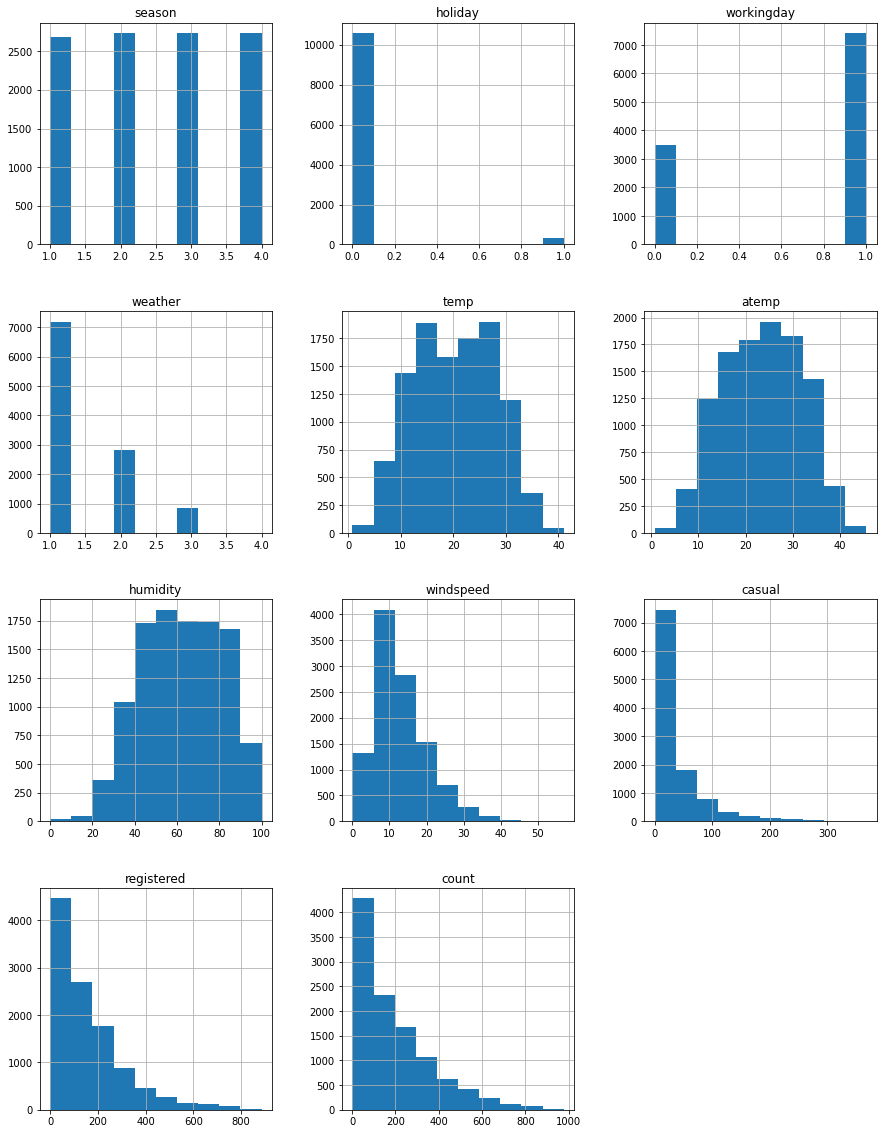

In [ ]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis

import matplotlib.pyplot as plt
   
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
train.hist(ax = ax)

In [ ]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
# convert datetime column into datetime format

train['datetime']= pd.to_datetime(train['datetime'])
test['datetime']= pd.to_datetime(test['datetime'])

In [ ]:
# create a new feature
train['hour'] = train['datetime'].dt.hour
train['DOW'] = train['datetime'].dt.day_name()
train['Month'] = train['datetime'].dt.month

test['hour'] = test['datetime'].dt.hour
test['DOW'] = test['datetime'].dt.day_name()
test['Month'] = test['datetime'].dt.month

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,DOW,Month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,Saturday,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,Saturday,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,Saturday,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,Saturday,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,Saturday,1


In [ ]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,DOW,Month
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0,Thursday,1
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,Thursday,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2,Thursday,1
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3,Thursday,1
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4,Thursday,1


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [ ]:
train["season"] = train["season"].astype('category')
train["weather"] = train["weather"].astype('category')
test["season"] = test["season"].astype('category')
test["weather"] = test["weather"].astype('category')

In [ ]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,DOW,Month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,Saturday,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,Saturday,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,Saturday,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,Saturday,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,Saturday,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  hour        10886 non-null  int64         
 13  DOW         10886 non-null  object        
 14  Month       10886 non-null  int64         
dtypes: category(2), datetime64[ns](1), float64(3), int64(8), object(1)
mem

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  import sys


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d748f5490>,
      dtype=object)

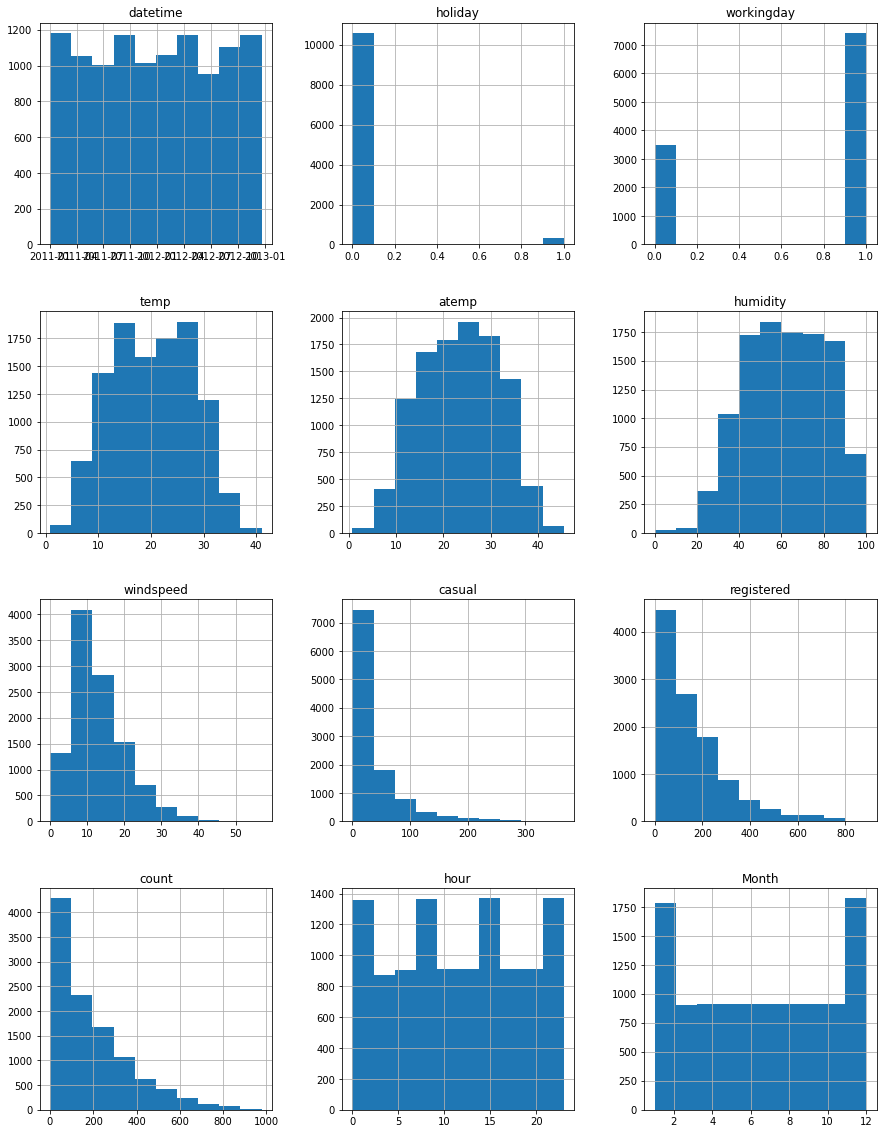

In [ ]:
# View histogram of all features again now with the hour feature

import matplotlib.pyplot as plt
   
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
train.hist(ax = ax)

## Step 5: Rerun the model with the same settings as before, just with more features

In [ ]:
# predictor_new_features = TabularPredictor(?).fit(?)

predictor_new_features = TabularPredictor(label="count", problem_type="regression", eval_metric="root_mean_squared_error").fit(
    train_data=train[train.columns[~train.columns.isin(['casual', 'registered'])]],
    time_limit=600,
    presets="best_quality",
)

No path specified. Models will be saved in: "AutogluonModels/ag-20220409_142513/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220409_142513/"
AutoGluon Version:  0.4.0
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    10886
Train Data Columns: 12
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11726.18 MB
	Train Data (Original)  Memory Usage: 1.5 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting Identity

In [ ]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.426089      17.683000  582.827323                0.001118           0.383626            3       True         12
1          CatBoost_BAG_L2  -30.645832      15.534846  496.140839                0.116479         108.319174            2       True         10
2          LightGBM_BAG_L2  -30.933177      15.827295  411.802125                0.408928          23.980459            2       True          9
3        LightGBMXT_BAG_L2  -31.496133      16.521232  417.111655                1.102865          29.289990            2       True          8
4      WeightedEnsemble_L2  -32.298955      14.863730  340.398960                0.001244           0.583055            2       True          7
5          LightGBM_BAG_L1  -33.822521       3.735603   49.047525         

{'leaderboard':                      model   score_val  pred_time_val    fit_time  \
 0      WeightedEnsemble_L3  -30.426089      17.683000  582.827323   
 1          CatBoost_BAG_L2  -30.645832      15.534846  496.140839   
 2          LightGBM_BAG_L2  -30.933177      15.827295  411.802125   
 3        LightGBMXT_BAG_L2  -31.496133      16.521232  417.111655   
 4      WeightedEnsemble_L2  -32.298955      14.863730  340.398960   
 5          LightGBM_BAG_L1  -33.822521       3.735603   49.047525   
 6        LightGBMXT_BAG_L1  -34.159379      10.762850   82.512544   
 7          CatBoost_BAG_L1  -34.482430       0.259727  208.222916   
 8   NeuralNetFastAI_BAG_L2  -37.086536      16.053610  420.854074   
 9   NeuralNetFastAI_BAG_L1  -71.620350       0.452367   47.963289   
 10   KNeighborsDist_BAG_L1  -84.125061       0.104306    0.032920   
 11   KNeighborsUnif_BAG_L1 -101.546199       0.103514    0.042471   
 
     pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \

In [ ]:
# Remember to set all negative values to zero

predictions_new = predictor_new_features.predict(test)

0

In [ ]:
predictions_new[predictions_new<0].count()

0

In [ ]:
# Same submitting predictions
submission_new_features = pd.read_csv('sampleSubmission.csv')
submission_new_features["count"] = predictions_new
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features submission"

100% 188k/188k [00:01<00:00, 105kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description              status    publicScore  privateScore  
---------------------------  -------------------  -----------------------  --------  -----------  ------------  
submission_new_features.csv  2022-04-09 15:39:05  new features submission  complete  0.74169      0.74169       
submission.csv               2022-04-04 05:46:32  first raw submission     complete  1.78841      1.78841       


#### New Score of 0.74169

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [ ]:
import autogluon.tabular.models.xgboost.hyperparameters.parameters as para_XGBoost

import autogluon.tabular.models.catboost.hyperparameters.parameters as para_CatBoost

In [ ]:
# read source code of XGBoost hyperparameter
para_XGBoost

<module 'autogluon.tabular.models.xgboost.hyperparameters.parameters' from '/usr/local/lib/python3.7/dist-packages/autogluon/tabular/models/xgboost/hyperparameters/parameters.py'>

In [ ]:
para_CatBoost

<module 'autogluon.tabular.models.catboost.hyperparameters.parameters' from '/usr/local/lib/python3.7/dist-packages/autogluon/tabular/models/catboost/hyperparameters/parameters.py'>

In [ ]:
# set up hyperparameters for tuning

import autogluon.core as ag

XGBoost_options = {   
    'learning_rate': ag.space.Real(0.01, 0.1, default=0.05),  # try different values of learning rates in XGBoost model
    'num_leaves': ag.space.Int(lower=100, upper=400, default=200),  # try different number of trees built in XGBoost model
}


CatBoost_options = {   
    'learning_rate': ag.space.Real(0.01, 0.1, default=0.05),  # try different values of learning rates in XGBoost model
    'depth': ag.space.Int(lower=4, upper=12, default=8),  # try different tree depth in CatBoost model
}

hyperparameters = {  
                   'XGB': XGBoost_options,
                   'CAT': CatBoost_options, 
                  } 

hyperparameter_tune_kwargs = {  
    'scheduler' : 'local',
    'searcher': 'auto',
}

In [ ]:
predictor_new_hpo = TabularPredictor(label="count", problem_type="regression", eval_metric="root_mean_squared_error").fit(
    train_data=train[train.columns[~train.columns.isin(['casual', 'registered'])]],
    time_limit=900,
    presets="best_quality",
    hyperparameters=hyperparameters, 
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
)

No path specified. Models will be saved in: "AutogluonModels/ag-20220416_063252/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 900s
AutoGluon will save models to "AutogluonModels/ag-20220416_063252/"
AutoGluon Version:  0.4.0
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    10886
Train Data Columns: 12
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12686.44 MB
	Train Data (Original)  Memory Usage: 1.5 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting Identity

[06:33:20] WARNING: ../src/learner.cc:573: 
Parameters: { "num_leaves" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:33:31] WARNING: ../src/learner.cc:573: 
Parameters: { "num_leaves" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:33:31] WARNING: ../src/learner.cc:573: 
Parameters: { "num_leaves" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:

	Stopping HPO to satisfy time limit...


[06:33:48] WARNING: ../src/learner.cc:573: 
Parameters: { "num_leaves" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:33:48] WARNING: ../src/learner.cc:573: 
Parameters: { "num_leaves" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




Fitted model: XGBoost_BAG_L1/T1 ...


[06:33:48] WARNING: ../src/learner.cc:573: 
Parameters: { "num_leaves" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:33:48] WARNING: ../src/learner.cc:573: 
Parameters: { "num_leaves" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




	-33.7566	 = Validation score   (root_mean_squared_error)
	10.84s	 = Training   runtime
	0.09s	 = Validation runtime
Fitted model: XGBoost_BAG_L1/T2 ...
	-32.8409	 = Validation score   (root_mean_squared_error)
	5.92s	 = Training   runtime
	0.06s	 = Validation runtime
Fitted model: XGBoost_BAG_L1/T3 ...
	-32.7428	 = Validation score   (root_mean_squared_error)
	10.88s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: CatBoost_BAG_L1/T1 ... Training model for up to 544.01s of the 844.06s of remaining time.
	Fitting 7 child models (S1F2 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	-32.6548	 = Validation score   (root_mean_squared_error)
	463.32s	 = Training   runtime
	0.39s	 = Validation runtime
Fitting model: XGBoost_BAG_L1/T1 ... Training model for up to 92.76s of the 392.81s of remaining time.
	Fitting 7 child models (S1F2 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	-34.7669	 = Validation score   (root_mean_squared_error)
	78.47s	 = Training   

[06:43:16] WARNING: ../src/learner.cc:573: 
Parameters: { "num_leaves" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:43:18] WARNING: ../src/learner.cc:573: 
Parameters: { "num_leaves" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:43:19] WARNING: ../src/learner.cc:573: 
Parameters: { "num_leaves" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:

	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L2/T1 ...
	-36.3186	 = Validation score   (root_mean_squared_error)
	2.09s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: XGBoost_BAG_L2/T2 ...
	-36.6902	 = Validation score   (root_mean_squared_error)
	1.93s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: XGBoost_BAG_L2/T3 ...
	-37.0063	 = Validation score   (root_mean_squared_error)
	7.39s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: CatBoost_BAG_L2/T1 ... Training model for up to 264.48s of the 264.47s of remaining time.


[06:43:28] WARNING: ../src/learner.cc:573: 
Parameters: { "num_leaves" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:43:28] WARNING: ../src/learner.cc:573: 
Parameters: { "num_leaves" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:43:28] WARNING: ../src/learner.cc:573: 
Parameters: { "num_leaves" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:

	Fitting 7 child models (S1F2 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	-32.8823	 = Validation score   (root_mean_squared_error)
	85.39s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: XGBoost_BAG_L2/T1 ... Training model for up to 189.16s of the 189.14s of remaining time.
	Fitting 7 child models (S1F2 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	-33.4346	 = Validation score   (root_mean_squared_error)
	23.2s	 = Training   runtime
	0.25s	 = Validation runtime
Fitting model: XGBoost_BAG_L2/T2 ... Training model for up to 163.74s of the 163.72s of remaining time.
	Fitting 7 child models (S1F2 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	-33.3132	 = Validation score   (root_mean_squared_error)
	21.89s	 = Training   runtime
	0.2s	 = Validation runtime
Fitting model: XGBoost_BAG_L2/T3 ... Training model for up to 139.7s of the 139.68s of remaining time.
	Fitting 7 child models (S1F2 - S1F8) | Fitting with ParallelLocalFoldFittingStrat

In [ ]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -32.498577       2.408065  576.971794                0.001295           0.359816            2       True          5
1   CatBoost_BAG_L1/T1 -32.654791       0.386321  463.315180                0.386321         463.315180            1       True          1
2    XGBoost_BAG_L1/T3 -32.742825       0.043502   10.875438                0.043502          10.875438            1       True          4
3  WeightedEnsemble_L3 -32.780625       3.035617  748.818859                0.001378           0.366577            3       True         10
4   CatBoost_BAG_L2/T1 -32.882268       2.540373  662.004163                0.133603          85.392185            2       True          6
5    XGBoost_BAG_L2/T2 -33.313194       2.605865  598.502002                0.199095          21.890024 

{'leaderboard':                  model  score_val  pred_time_val    fit_time  \
 0  WeightedEnsemble_L2 -32.498577       2.408065  576.971794   
 1   CatBoost_BAG_L1/T1 -32.654791       0.386321  463.315180   
 2    XGBoost_BAG_L1/T3 -32.742825       0.043502   10.875438   
 3  WeightedEnsemble_L3 -32.780625       3.035617  748.818859   
 4   CatBoost_BAG_L2/T1 -32.882268       2.540373  662.004163   
 5    XGBoost_BAG_L2/T2 -33.313194       2.605865  598.502002   
 6    XGBoost_BAG_L2/T1 -33.434559       2.659843  599.811800   
 7    XGBoost_BAG_L2/T3 -33.826869       2.647563  639.860276   
 8    XGBoost_BAG_L1/T2 -34.267986       0.751626   34.825118   
 9    XGBoost_BAG_L1/T1 -34.766928       1.268823   78.471680   
 
    pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
 0                0.001295           0.359816            2       True   
 1                0.386321         463.315180            1       True   
 2                0.043502          10.875438    

In [ ]:
# Remember to set all negative values to zero
predictions_new_hpo = predictor_new_hpo.predict(test)


[07:02:43] WARNING: ../src/learner.cc:573: 
Parameters: { "num_leaves" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[07:02:43] WARNING: ../src/learner.cc:573: 
Parameters: { "num_leaves" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[07:02:44] WARNING: ../src/learner.cc:573: 
Parameters: { "num_leaves" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[07:

176

In [ ]:
predictions_new_hpo[predictions_new_hpo<0].count()

176

In [ ]:
predictions_new_hpo.head()

0    12.413012
1    -1.654086
2    -4.198712
3    -1.906206
4    -1.762245
Name: count, dtype: float32

In [ ]:
predictions_new_hpo = predictions_new_hpo.apply(lambda x : x if x > 0 else 0)

In [ ]:
predictions_new_hpo[predictions_new_hpo<0].count()

0

In [ ]:
# Same submitting predictions
submission_new_hpo = pd.read_csv('sampleSubmission.csv')
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 240k/240k [00:00<00:00, 1.15MB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6


fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2022-04-16 07:07:28  new features with hyperparameters  complete  0.57669      0.57669       
submission_new_features.csv  2022-04-09 15:39:05  new features submission            complete  0.74169      0.74169       
submission.csv               2022-04-04 05:46:32  first raw submission               complete  1.78841      1.78841       




#### New Score of 0.57669

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

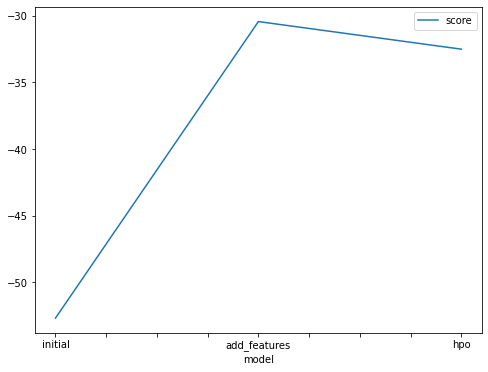

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-52.683629, -30.426089, -32.498577]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

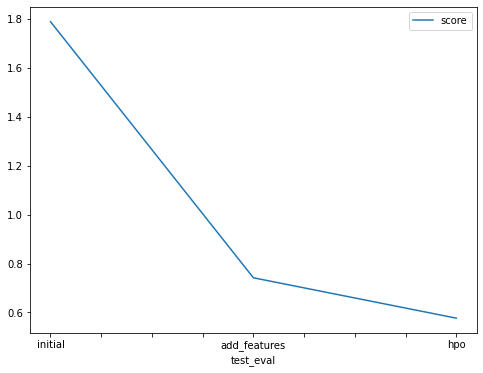

In [ ]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.78841, 0.74169, 0.57669]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [2]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "timelimit": ["600", "600", "900"],
    'num_leaves in XGBoost': ["default", "default", "between 100 and 400"], 
    "tree_dept in CatBoost": ["default", "default", "between 4 and 12"], 
    "learning_rate in XGBoost": ["default", "default", "between 0.01 and 0.1"], 
    "learning_rate in CatBoost": ["default", "default", "between 0.01 and 0.1"], 
    "Kaggle score": [1.78841, 0.74169, 0.57669]
})

,model,timelimit,num_leaves in XGBoost,tree_dept in CatBoost,learning_rate in XGBoost,learning_rate in CatBoost,Kaggle score
0,initial,600,default,default,default,default,1.78841
1,add_features,600,default,default,default,default,0.74169
2,hpo,900,between 100 and 400,between 4 and 12,between 0.01 and 0.1,between 0.01 and 0.1,0.57669
